In [1]:
#Importamos librerias utiles
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math as m
#librerias para segmentado por superpixeles
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.segmentation import random_walker
#para leer las imagenes en orden alfabetico "humano"
import re
#para leer las imagenes en el path
import os
#para obtener las caracteristicas de textura 
from skimage.feature import greycomatrix
from skimage.feature import greycoprops
from skimage.feature import local_binary_pattern as lbp

# Separacion de conjuntos de entrenamiento y validacion

In [2]:
#funcion para convertir texto a int para ordenar las carpetas a leer
def atoi(text):
    return int(text) if text.isdigit() else text
#funcion para obtener el ordenamiento
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text)]
#creamos una lista vacia que contendra las imagenes. En cada casilla contendra un tipo de hoja, es decir.
#esta es una lista de listas
listImages = []
#iteramos sobre el path y las carpetas con os.walk
for path, dirs, files in os.walk('./mascaras'):
    #iteramos sobre las carpetas con nombre ordenado, tipo0, tipo1, tipo2, etc
    for dirnames in sorted(dirs, key=natural_keys):
        #definimos una lista auxiliar que contendra todas las imagenes de una carpeta especifica
        auxList = [cv2.imread(file,0) for file in sorted(glob.glob('mascaras/'+dirnames+'/*.png'),key=natural_keys)]
        #hacemos append de dicha lista auxiliar para obtener la lista con todas las imagenes
        #de las hojas en una casilla determinada
        listImages.append(auxList)
#convertimos la lista en arrays de numpy para que sea mas manejable
listImages = np.array(listImages)

In [3]:
#creamos una lista vacia que contendra los binarios de las imagenes. En cada casilla contendra un tipo de hoja, es decir.
#esta es una lista de listas
binarios = []
auxList = []
#iteramos sobre el path y las carpetas con os.walk
for path, dirs, files in os.walk('./binarios'):
    #iteramos sobre las carpetas con nombre ordenado, tipo0, tipo1, tipo2, etc
    for dirnames in sorted(dirs, key=natural_keys):
        #definimos una lista auxiliar que contendra todas las imagenes de una carpeta especifica
        auxList = [cv2.imread(file,0) for file in sorted(glob.glob('binarios/'+dirnames+'/*.png'),key=natural_keys)]
        #hacemos append de dicha lista auxiliar para obtener la lista con todas las imagenes
        #de las hojas en una casilla determinada
        binarios.append(auxList)
#convertimos la lista en arrays de numpy para que sea mas manejable
binarios = np.array(binarios)

In [4]:
#funcion para mostrar n imagenes
def muestraImagenes(imagen, filas, columnas):
    plt.figure(figsize = (16,16))
    for i in range (filas*columnas):
        plt.subplot(filas, columnas, i + 1)
        plt.imshow(imagen[i], cmap='gray')
        plt.title('Imagen %d' %i)
        plt.xticks(())
        plt.yticks(())

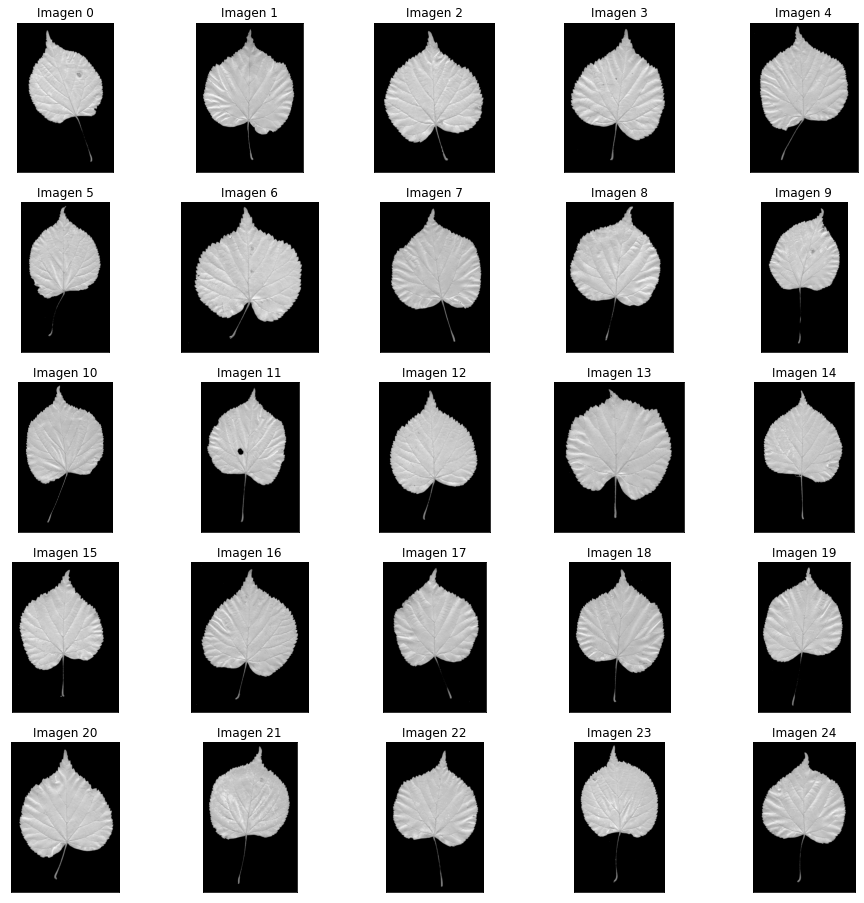

In [5]:
muestraImagenes(listImages[11,:25],5,5)

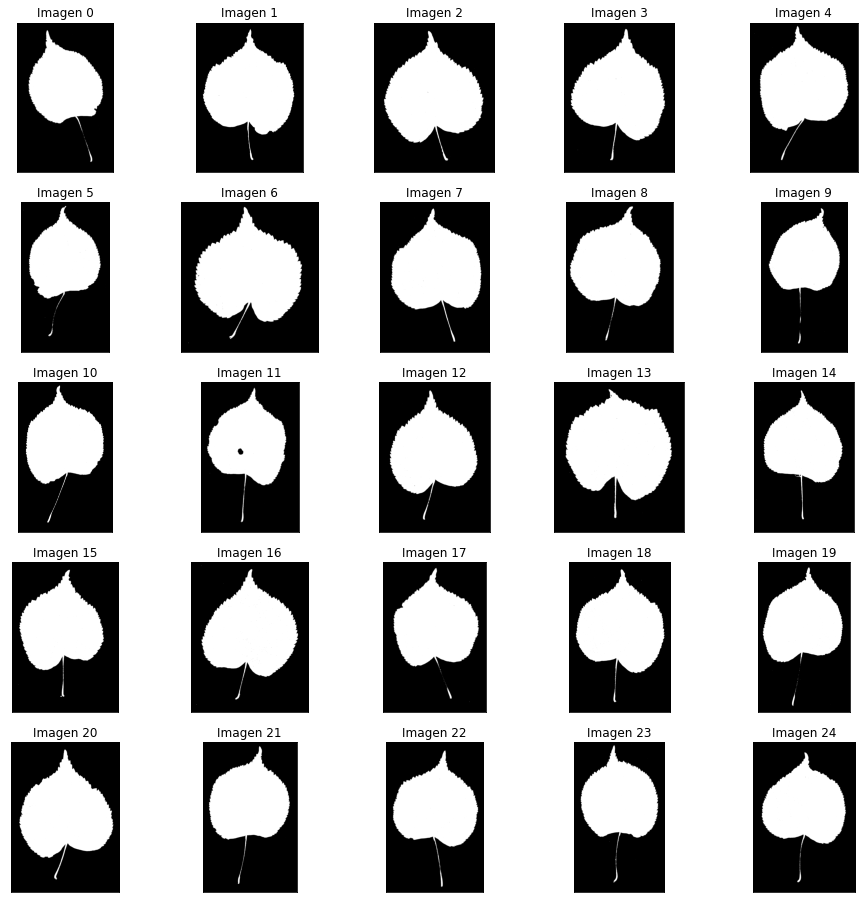

In [6]:
muestraImagenes(binarios[11,:25],5,5)

In [7]:
#definimos una semilla para reproducibilidad
np.random.seed(15)
#calculamos un array de numeros aleatorios
#sirve para obtener en indice de nuestras muestras de validacion
#15 imagenes por clase en total 225 imagenes de validacion 
randomIndex = np.random.choice(75, 15)
randomIndex = np.sort(randomIndex)
print(randomIndex)

auxIndex = np.arange(0,15)
print(auxIndex)

[ 0  5 10 12 15 17 23 27 28 31 32 47 62 71 72]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [8]:
#definimos la lista test que contendra las imagenes de test
#15 por cada casilla, donde cada casilla correspondera a una clase
test = []
#iteramos sobre todas las clases o tipos
for i in range(listImages.shape[0]):
    #hacemos append a la lista clase de las 15 imagenes de test
    #segun el indice random
    test.append(listImages[i,randomIndex])
#convertimos la lista a un numpy array
test = np.array(test)  

#creamos la lista para los binarios
testBin = []
#iteramos sobre todas las clases o tipos
for i in range(binarios.shape[0]):
    #hacemos append a la lista clase de las 15 imagenes de test
    #segun el indice random
    testBin.append(binarios[i,randomIndex])
#convertimos la lista a un numpy array
testBin = np.array(testBin)  

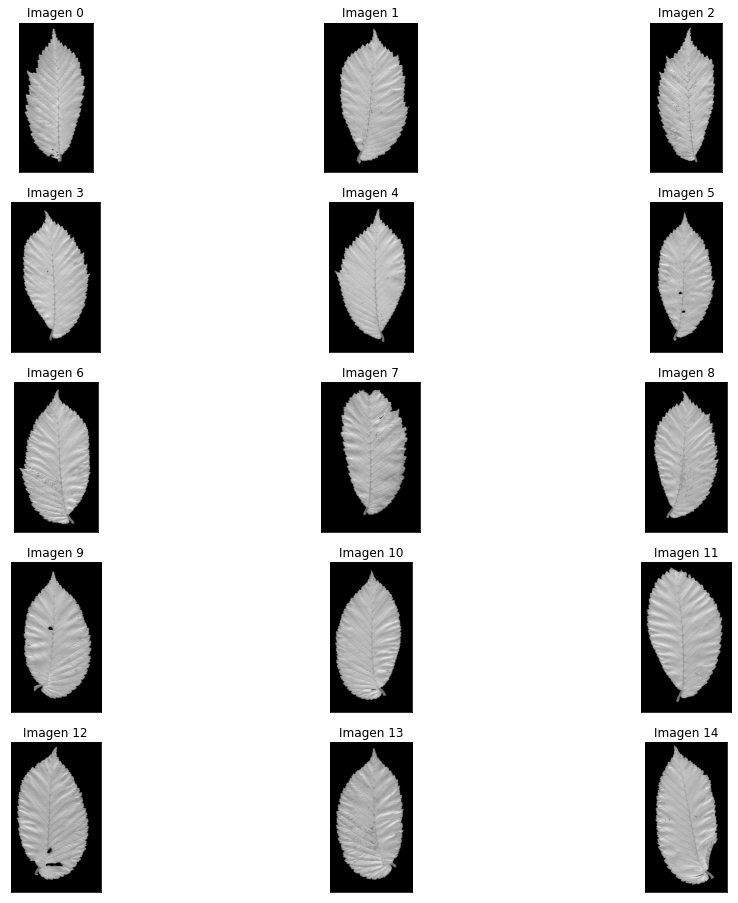

In [9]:
#verificamos visualmente para la clase 2
muestraImagenes(test[2],5,3)

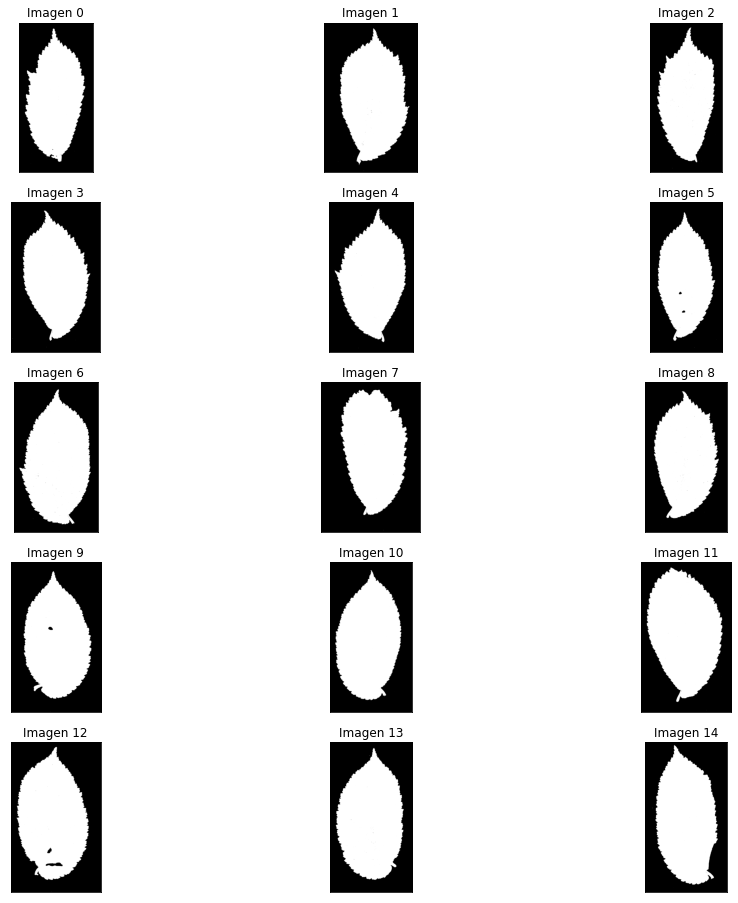

In [10]:
#verificamos visualmente para la clase 2
muestraImagenes(testBin[2],5,3)

In [11]:
#obtenemos los indices para los cuales no se obtiene una imagen de test
indexT = np.arange(75)
indexT = np.setdiff1d(indexT,randomIndex)
print(indexT)

[ 1  2  3  4  6  7  8  9 11 13 14 16 18 19 20 21 22 24 25 26 29 30 33 34
 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 63 64 65 66 67 68 69 70 73 74]


In [12]:
#ahora hacemos la lista de entrenamiento
#definimos la lista train que contendra el complemento de las imagenes de test
train = []
#iteramos sobre todas las clases o tipos
for i in range(listImages.shape[0]):
    #hacemos append a la lista clase de las imagenes que no son de test
    #segun el iindice indexT
    train.append(listImages[i,indexT])
#convertimos la lista a un numpy array
train = np.array(train)
#definimos para los binarios
trainBin = []
#iteramos sobre todas las clases o tipos
for i in range(binarios.shape[0]):
    #hacemos append a la lista clase de las imagenes que no son de test
    #segun el iindice indexT
    trainBin.append(binarios[i,indexT])
#convertimos la lista a un numpy array
trainBin = np.array(trainBin)

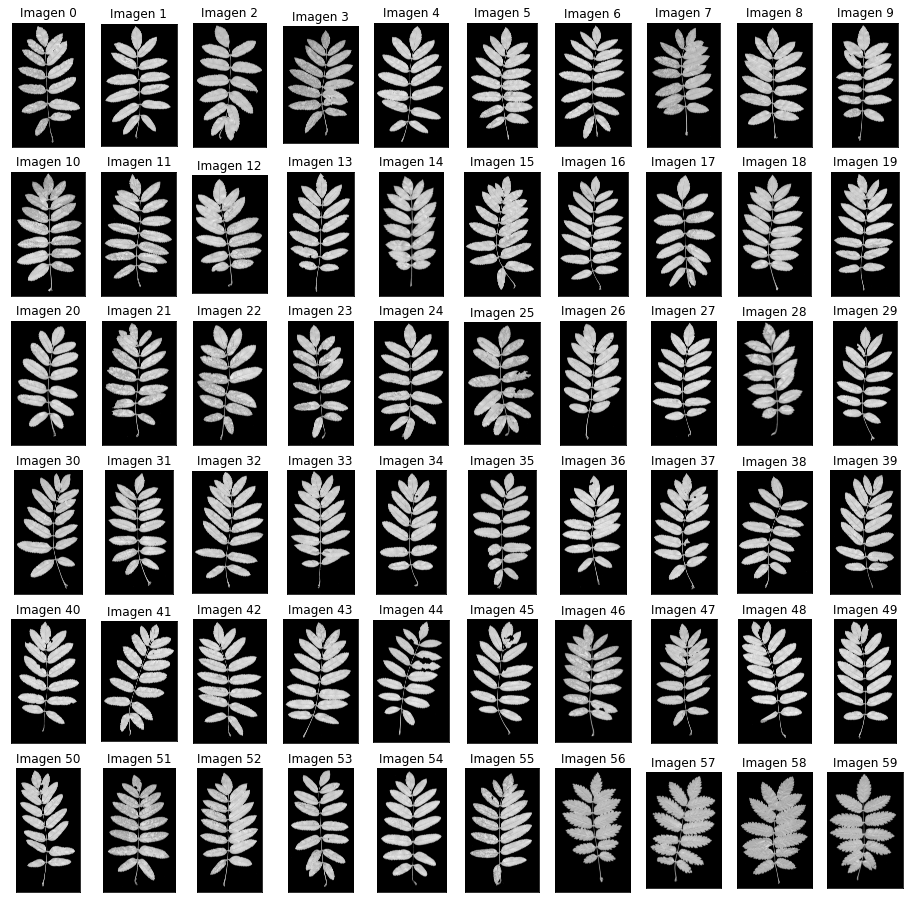

In [13]:
#verificamos visualmente para la clase 2
muestraImagenes(train[9],6,10)

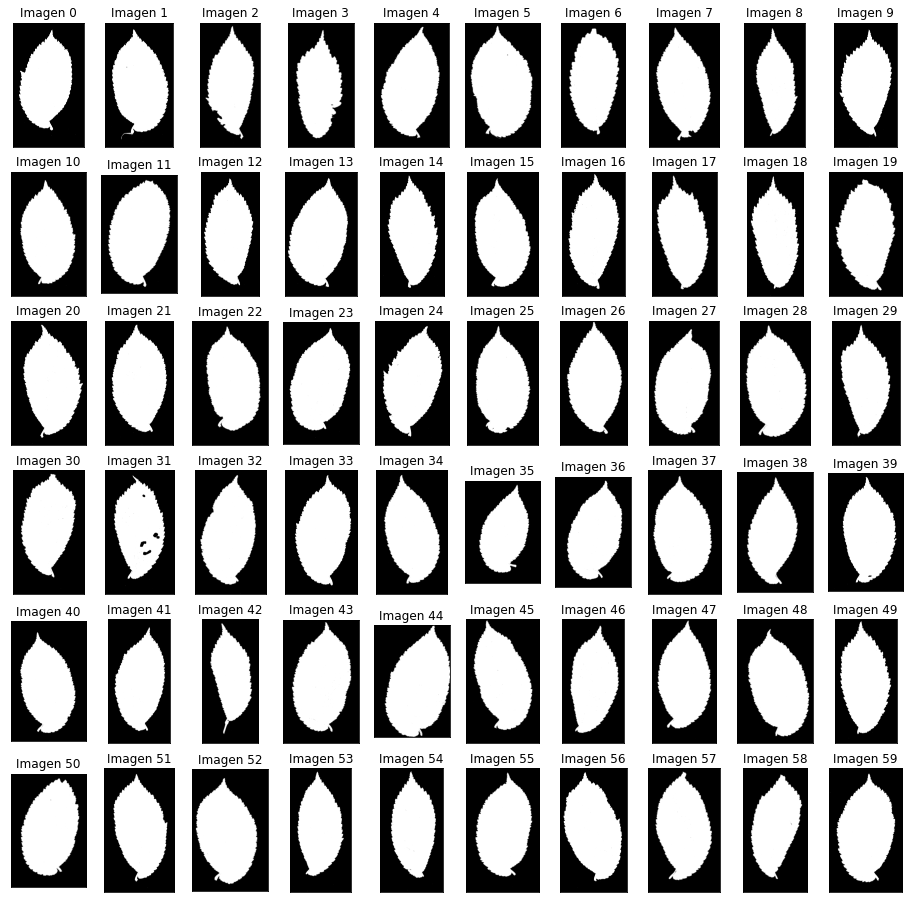

In [14]:
#verificamos visualmente para la clase 2
muestraImagenes(trainBin[2],6,10)

In [15]:
print('El conjunto de entrenamiento tiene %d clases con %d imagenes por clase'%(train.shape[0],train.shape[1]))
print('El conjunto de validacion tiene %d clases con %d imagenes por clase'%(test.shape[0],test.shape[1]))

El conjunto de entrenamiento tiene 15 clases con 60 imagenes por clase
El conjunto de validacion tiene 15 clases con 15 imagenes por clase


In [16]:
print(train[0,0].shape)
print(trainBin[0,0].shape)

(2143, 1147)
(2143, 1147)


# Superpixeles

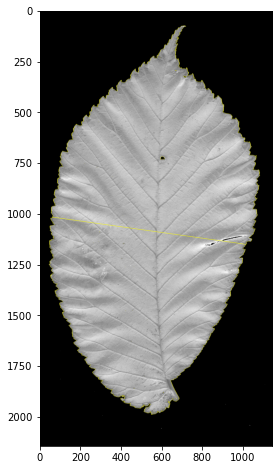

In [17]:
#El siguiente codigo es de muestra para que se entienda que es lo que se esta haciendo:
#definimos la variable segmented que va a tener los superpixeles de la imagen
#se trata de un array con numeros que pertenecen a cirtas clases.
#Para poder usar las mascaras es necesario tener instalado
#scikit-image en su version 0.17.2 o posterior
segmented = slic(train[0,0], n_segments = 2, mask=trainBin[0,0],enforce_connectivity=True)
#mostamos la imagen en gris y los superpixeles recien calculados
#note que los superpixeles son las regiones encerradas por fronteras amarillas
fig = plt.figure("Superpixels -- segments",figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(train[0,0], segmented))    
plt.show()

In [18]:
#mostremos como es una superpixel en forma de array
print(segmented)
#imprimimos las posiciones de los pixeles que corresponden al superpixel 7
print(np.where(segmented==7))
#imprimimos las posiciones de los pixeles que corresponden al superpixel 0 (corresponde al fondo negro)
print(np.where(segmented==0))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(array([], dtype=int64), array([], dtype=int64))
(array([   0,    0,    0, ..., 2142, 2142, 2142], dtype=int64), array([   0,    1,    2, ..., 1144, 1145, 1146], dtype=int64))


In [19]:
#superpixeles para train
#creamos una copia del array que contiene las imagenes, esta copia contendra los superpixeles
#que seran arrays de las misma dimensiones de las imagenes correspondientes
superpixelTrain = np.copy(train)
#hacemos varios ciclos for para calcular los superpixeles de cada imagen de train
#iteramos sobre las clases
for clase in range(train.shape[0]):
    #nos saltamos la clase 9 ya que es problematica al querer considerar los superpixeles conectados
    #para esta clase hacemos un for independiente con los superpixeles no conectados
    #este problema se debe a la morfologia de la flor
    if (clase == 9):
        continue
    #imprimimos el estado actual del ciclo, esto para conocer su progreso
    print('Analizando la clase '+str(clase))
    #iteramos sobre todas las imagenes de una clase dada
    for imagen in range(train.shape[1]):
        #corremos el algoritmo slic sobre la imagen actual
        segmented = slic(train[clase,imagen], n_segments = 10, mask=trainBin[clase,imagen],enforce_connectivity=True)
        #en la posicion de la copia de la imagen original colocamos el array de sus superpixeles
        superpixelTrain[clase,imagen] = segmented
#este es el ciclo for independiente para la clase 9, aqui solo hay que iterar sobre las imagenes
for imagen in range(train.shape[1]):
    #imprimimos el estado actual del ciclo, esto para conocer su progreso
    print('Para la clase 9 se analiza la imagen '+str(imagen))
    #corremos el algoritmo slic sobre la imagen actual de la clase 9, note la variable de entrada
    #enforce_connectivity=False seteada en false esto indica que los superpixeles no tienen que
    #forzosamente estar interconectados
    segmented = slic(train[9,imagen], n_segments = 10, mask=trainBin[9,imagen],enforce_connectivity=False)
    #en la posicion de la copia de la imagen original colocamos el array de sus superpixeles
    superpixelTrain[9,imagen] = segmented
#tiempo aproximado de ejecucion: 50 minutos para 50 segmentos y 80 segmentos de clase 9
#tiempo aproximado de ejecucion: 16 minutos para 5 segmentos y 8 segmentos de clase 9
#tiempo aproximado de ejecucion: 12 minutos para 2 segmentos y 5 segmentos de clase 9

Analizando la clase 0
Analizando la clase 1
Analizando la clase 2
Analizando la clase 3
Analizando la clase 4
Analizando la clase 5
Analizando la clase 6
Analizando la clase 7
Analizando la clase 8
Analizando la clase 10
Analizando la clase 11
Analizando la clase 12
Analizando la clase 13
Analizando la clase 14
Para la clase 9 se analiza la imagen 0
Para la clase 9 se analiza la imagen 1
Para la clase 9 se analiza la imagen 2
Para la clase 9 se analiza la imagen 3
Para la clase 9 se analiza la imagen 4
Para la clase 9 se analiza la imagen 5
Para la clase 9 se analiza la imagen 6
Para la clase 9 se analiza la imagen 7
Para la clase 9 se analiza la imagen 8
Para la clase 9 se analiza la imagen 9
Para la clase 9 se analiza la imagen 10
Para la clase 9 se analiza la imagen 11
Para la clase 9 se analiza la imagen 12
Para la clase 9 se analiza la imagen 13
Para la clase 9 se analiza la imagen 14
Para la clase 9 se analiza la imagen 15
Para la clase 9 se analiza la imagen 16
Para la clase 9 s

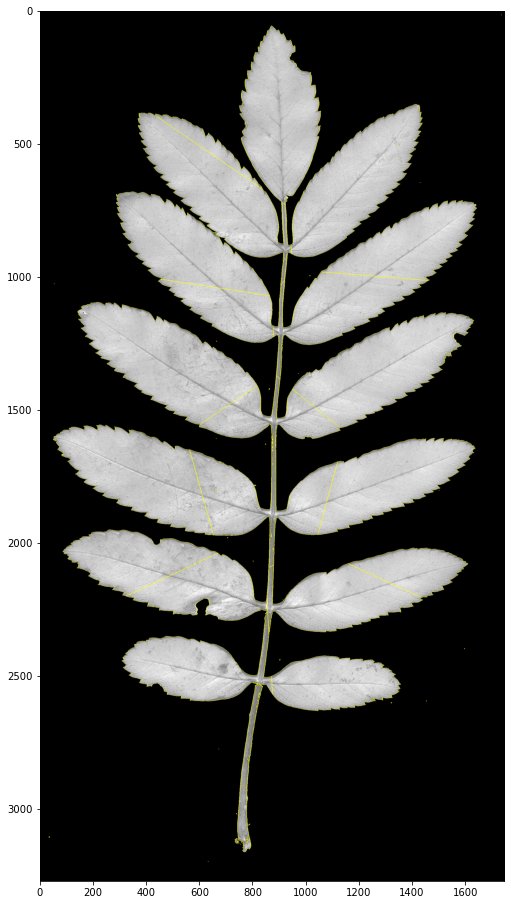

In [20]:
#motramos un resultado en particular
fig = plt.figure("Superpixels -- segments",figsize=(16,16))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(train[9,13], superpixelTrain[9,13]))    
plt.show()

In [21]:
#creamos una funcion para mostrar la imagen y sus superpixeles
#solo para corroborar visualmente
def muestraSuperP(imagenes,superpixeles,filas,columnas):
    plt.figure(figsize = (16,16))
    for i in range (filas*columnas):
        plt.subplot(filas, columnas, i + 1)
        plt.imshow(mark_boundaries(imagenes[i], superpixeles[i]))
        plt.title('Superpixeles Imagen %d' %i)
        plt.xticks(())
        plt.yticks(())
    

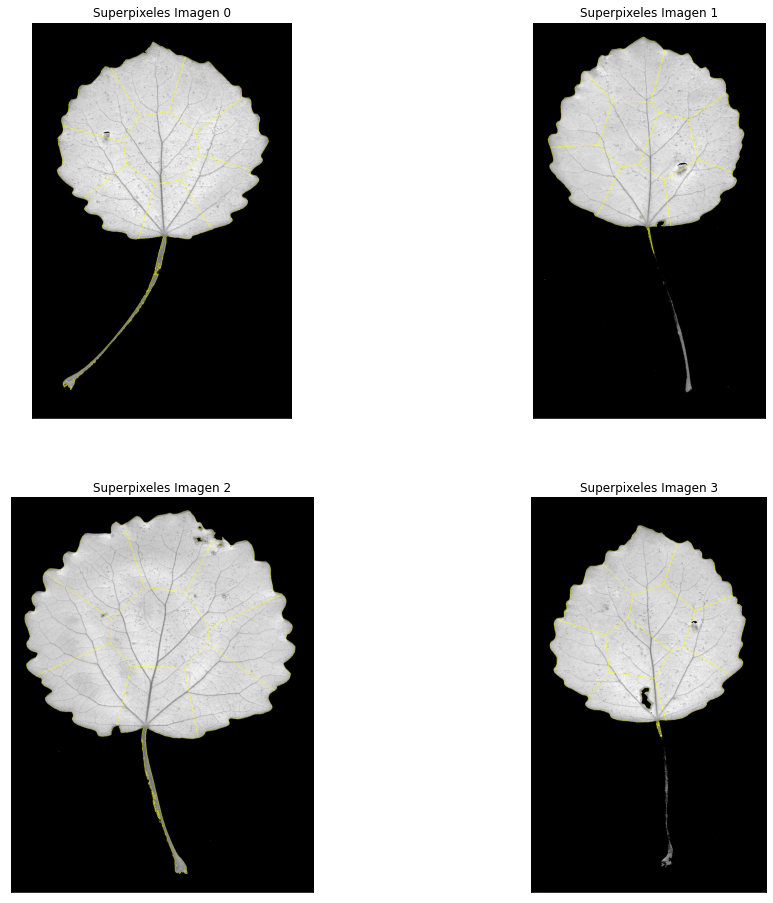

In [22]:
#mostramos los resultados para las primeras 9 imagenes de la clase 7
muestraSuperP(train[7,:4],superpixelTrain[7,:4],2,2)

In [24]:
#superpixeles para test
#creamos una copia del array que contiene las imagenes, esta copia contendra los superpixeles
#que seran arrays de las misma dimensiones de las imagenes correspondientes
superpixelTest = np.copy(test)
#hacemos varios ciclos for para calcular los superpixeles de cada imagen de test
#iteramos sobre las clases
for clase in range(test.shape[0]):
    #nos saltamos la clase 9 ya que es problematica al querer considerar los superpixeles conectados
    #para esta clase hacemos un for independiente con los superpixeles no conectados
    #este problema se debe a la morfologia de la flor
    if (clase == 9):
        continue
    #imprimimos el estado actual del ciclo, esto para conocer su progreso
    print('Analizando la clase '+str(clase))
    #iteramos sobre todas las imagenes de una clase dada
    for imagen in range(test.shape[1]):
        #corremos el algoritmo slic sobre la imagen actual
        segmented = slic(test[clase,imagen], n_segments = 10, mask=testBin[clase,imagen],enforce_connectivity=True)
        #en la posicion de la copia de la imagen original colocamos el array de sus superpixeles
        superpixelTest[clase,imagen] = segmented
#este es el ciclo for independiente para la clase 9, aqui solo hay que iterar sobre las imagenes        
for imagen in range(test.shape[1]):
    #imprimimos el estado actual del ciclo, esto para conocer su progreso
    print('Para la clase 9 se analiza la imagen '+str(imagen))
    #corremos el algoritmo slic sobre la imagen actual de la clase 9, note la variable de entrada
    #enforce_connectivity=False seteada en false esto indica que los superpixeles no tienen que
    #forzosamente estar interconectados
    segmented = slic(test[9,imagen], n_segments = 10, mask=testBin[9,imagen],enforce_connectivity=False)
    #en la posicion de la copia de la imagen original colocamos el array de sus superpixeles
    superpixelTest[9,imagen] = segmented
#tiempo aproximado de ejecucion: 15 minutos para 50 segmentos y 80 segmentos de clase 9
#tiempo aproximado de ejecucion: 5 minutos para 5 segmentos y 8 segmentos de clase 9
#tiempo aproximado de ejecucion: 3 minutos para 2 segmentos y 5 segmentos de clase 9

Analizando la clase 0
Analizando la clase 1
Analizando la clase 2
Analizando la clase 3
Analizando la clase 4
Analizando la clase 5
Analizando la clase 6
Analizando la clase 7
Analizando la clase 8
Analizando la clase 10
Analizando la clase 11
Analizando la clase 12
Analizando la clase 13
Analizando la clase 14
Para la clase 9 se analiza la imagen 0
Para la clase 9 se analiza la imagen 1
Para la clase 9 se analiza la imagen 2
Para la clase 9 se analiza la imagen 3
Para la clase 9 se analiza la imagen 4
Para la clase 9 se analiza la imagen 5
Para la clase 9 se analiza la imagen 6
Para la clase 9 se analiza la imagen 7
Para la clase 9 se analiza la imagen 8
Para la clase 9 se analiza la imagen 9
Para la clase 9 se analiza la imagen 10
Para la clase 9 se analiza la imagen 11
Para la clase 9 se analiza la imagen 12
Para la clase 9 se analiza la imagen 13
Para la clase 9 se analiza la imagen 14


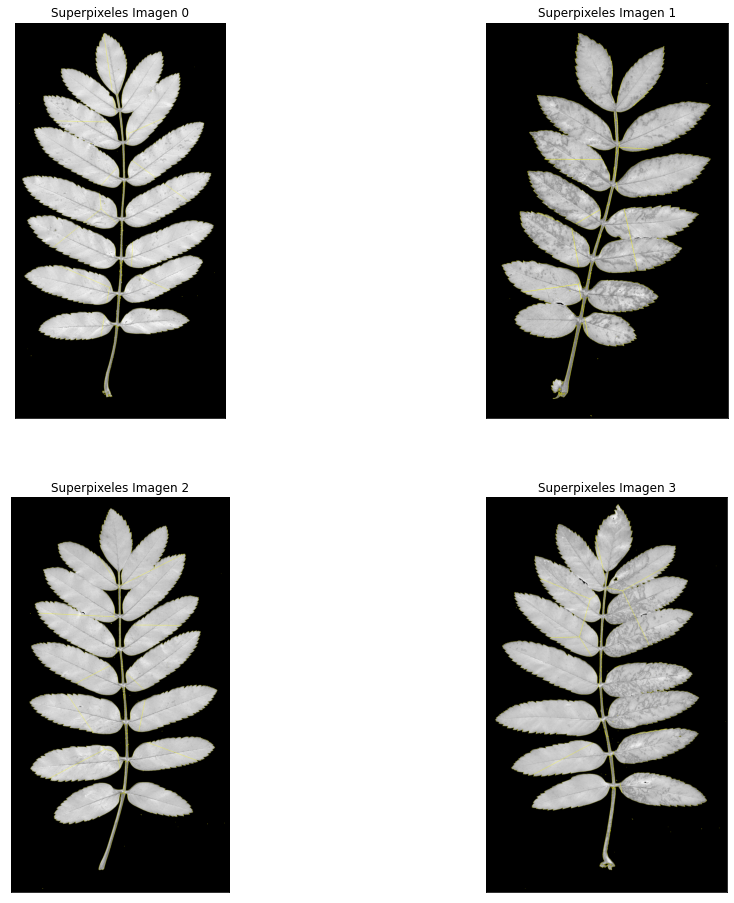

In [25]:
#mostramos los resultados para las primeras 9 imagenes de la clase 7
muestraSuperP(test[9,:4],superpixelTest[9,:4],2,2)

## Local Binary Pattern: area

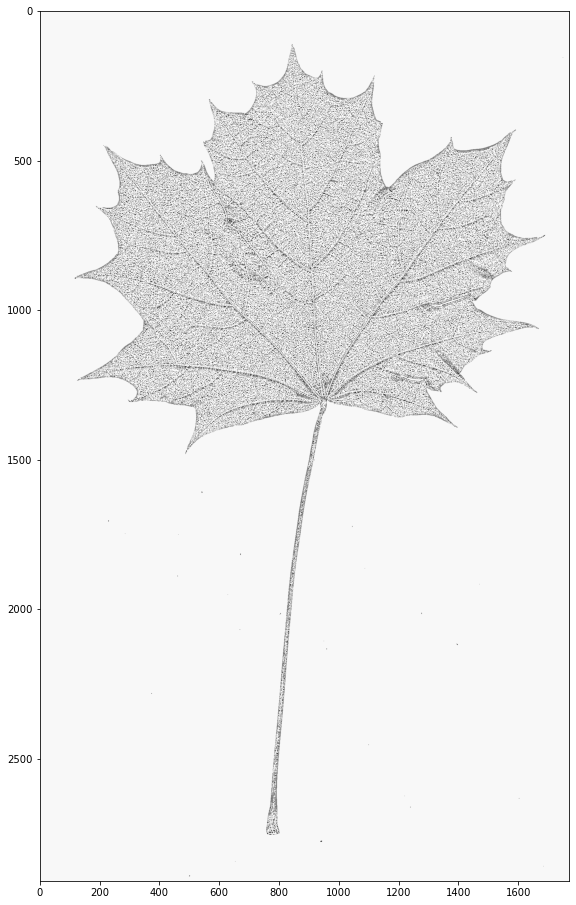

In [23]:
#mostramos como ejemplo la imagen que resula al aplicar la funcion local_binary_pattern
#de scikit image a una imagen cualquiera. los argumentos 32 y 3 corresponden a los vecinos
#simetricos y el radio del circulo a considerar
LBP = lbp(train[1,6],32,3,method='uniform')
#mostramos el resultado. Se encontró que el parametro de los vecinos
#es quien dicta el limite de valores de gris, si se pasa 32, entonces
#el maximo de valores de gris va a ser 32+3
plt.figure(figsize = (16,16))
plt.imshow(LBP,cmap='gray')

In [26]:
#calculamos el histograma de la imagen resultante
histograma = cv2.calcHist([LBP.astype(np.uint8)],[0],trainBin[1,6],[256],[0,256])
#normalizamos el histograma
histograma = histograma/sum(histograma)
#calculamos el área bajo la curva del histograma usando la definicion
#de suma de Rieman, cada poligono tiene base 1 y altura el valor del histograma
#por lo que el area se reduce a calcular la suma de las alturas
area = sum(histograma[:33])[0]
#imprimimos el valor del area
print(area)

0.37415218


In [27]:
#creamos una funcion para calcular el area debajoo del histograma
def areas(imagenes,binarios):
    #lista auxiliar para almacenar las areas segun su clase
    lista = []
    #iteramos sobre todas las clases
    for clase in range(imagenes.shape[0]):
        #lista auxiliar para almacenar las areas segun cada imagen
        auxlist = []
        #llevamos un track del progreso
        print('Analizando clase '+str(clase))
        #iteramos sobre todas las imagenes
        for imagen in range(imagenes.shape[1]):
            #creamos la imagen LBP usando la funcion local_binary_pattern
            #de scikit image, para cada imagen en turno segun el valor de imagen y clase
            LBP = lbp(imagenes[clase,imagen],32,3,method='uniform')
            #calculamos el histograma de la LBP unicamente en la zona definida
            #por los binarios o mascaras binarias, por esa razon se agregan como
            #argumento dichas imagenes. La imagen LBP hay que pasarla a uint8
            #ya que la funcion local_binary_pattern regresa una matriz del tipo float
            #el histograma barre todos los valores posibles de una imagenn en gris
            #de 0 a 255
            histograma = cv2.calcHist([LBP.astype(np.uint8)],[0],binarios[clase,imagen],[256],[0,256])
            #normalizamos el histograma para asegurar una invarianza ante la escala
            histograma = histograma/sum(histograma)
            #usamos suma de Riemman para calcular el area bajo el histograma
            #sin considerar los ultimos dos valores ya que si se hace el area siempre es 1
            #estos valores corresponden a zonas muy parecidas al fondo. Esto lo descubri a traves
            #del codigo de prueba que se encuentra hasta el final de este notebook
            area = sum(histograma[:33])[0]
            #hacemos un append del area recien calculada
            auxlist.append(area)
        #cada vez que termine de calcular las areas de una clase se hace un append a la lista   
        lista.append(auxlist)
    #pasamos a un array de numpy la lista lista
    lista = np.array(lista)
    print('Terminado')
    return lista

In [28]:
#calculamos las areas para las imagenes de test
areasTest = areas(test,testBin)

Analizando clase 0
Analizando clase 1
Analizando clase 2
Analizando clase 3
Analizando clase 4
Analizando clase 5
Analizando clase 6
Analizando clase 7
Analizando clase 8
Analizando clase 9
Analizando clase 10
Analizando clase 11
Analizando clase 12
Analizando clase 13
Analizando clase 14
Terminado


In [29]:
#calculamos las areas para las imagenes de train
areasTrain = areas(train,trainBin)

Analizando clase 0
Analizando clase 1
Analizando clase 2
Analizando clase 3
Analizando clase 4
Analizando clase 5
Analizando clase 6
Analizando clase 7
Analizando clase 8
Analizando clase 9
Analizando clase 10
Analizando clase 11
Analizando clase 12
Analizando clase 13
Analizando clase 14
Terminado


## Datos de textura a partir de los superpixeles

In [30]:
#creamos una funcion que obtiene los datos de textura a partir de la imagen y sus superpixeles
def datosTextura(imagenes,superpixeles,areas):
    #creamos un data frame que contendra la informacion de textura y su respectiva clase
    df = pd.DataFrame({"contraste":[]})
    #iteramos sobre las clases
    for clase in range(imagenes.shape[0]):
        #iteramos sobre las imagenes de cada clase
        for imagen in range(imagenes.shape[1]):
            #calculamos los momentos geometricos de cada imagen segun su clase e imagen en turno
            #estos momentos son necesarios para obtener los momentos de Hu
            moments = cv2.moments(imagenes[clase,imagen])
            #calculamos los momentos de Hu
            huMoments = cv2.HuMoments(moments)
            #Dado que se obtienen 7 valores en un array hay que iterar sobre ellos
            #para poder hacer un escalado de los mismos, ya que las proporciones
            #difieren significativamente entre si
            for i in range(0,7):
                huMoments[i] = np.log(abs(huMoments[i]))
            #iteramos sobre todos los superpixeles de la imagen en turno
            for clasesuperpixel in range(1,np.amax(superpixeles[clase,imagen])+1):
                #buscamos la region del superpixel, como se explico los superpixeles
                #pertenecen a un grupo con una etiqueta
                segment = np.where(superpixeles[clase,imagen]==clasesuperpixel)
                #creamos una imagen auxiliar de puros ceros con las dimensiones de la imagen original
                auximage = np.zeros((imagenes[clase,imagen].shape[0],imagenes[clase,imagen].shape[1]),dtype=np.uint8)
                #en la posicion del superpixel definimos los valores como 1, 0 en otro caso
                auximage[segment] = 1
                #multiplicamos la imagen auxiliar con la imagen, esto para obtener una imagen de fondo
                #negro con unicamente el superpixel en turno
                auximage = auximage*imagenes[clase,imagen]
                #definimos la matriz de coocurrencia
                GLCM = greycomatrix(auximage,distances=[1],angles=[0],symmetric=False,normed=True)
                #dado que la matriz cuenta las vecinos y sabemos que la imagen multiplicada tiene valores de cero
                #debemos quitar las cuentas para los valores de cero. Esto se hace eliminando la primera fila y columna
                GLCM = GLCM[1:,1:,:,:]
                #obtenemos las propiedades de la GLCM
                contrast = greycoprops(GLCM,'contrast')
                dissimilarity = greycoprops(GLCM,'dissimilarity')
                homogeneity = greycoprops(GLCM,'homogeneity')
                asm = greycoprops(GLCM,'ASM')
                energy = greycoprops(GLCM,'energy')
                correlation = greycoprops(GLCM,'correlation')
                #dado que los valores pueden variar en rango aplicamos una transformacion
                #logaritmica para obtener un rango mas pequeño. Esta transformacion actua como
                #un escalador
                contrast = np.log(abs(contrast[0,0]))
                dissimilarity = np.log(abs(dissimilarity[0,0]))
                homogeneity = -1*m.copysign(1.0, homogeneity[0,0])*np.log(abs(homogeneity[0,0]))
                asm = -1*m.copysign(1.0, asm[0,0])*np.log(abs(asm[0,0]))
                energy = -1*m.copysign(1.0, energy[0,0])*np.log(abs(energy[0,0]))
                #correlation = -1*m.copysign(1.0, correlation[0,0])*np.log(abs(correlation[0,0]))
                correlation = correlation[0,0]
                #creamos un nuevo dataframe con los datos de las propiedades escaladas de la GLCM recien calculada
                #tambien incluimos los valores de los momentos de Hu y las areas previamente calculadas.
                df1 = pd.DataFrame({"contraste":contrast,'disimilitud':dissimilarity,'homogeneidad':homogeneity,
                                    'asm':asm,'energia':energy,'correlacion':correlation, 'h1':huMoments[0], 'h2':huMoments[1],
                                    'h3':huMoments[2],'h4':huMoments[3],'h5':huMoments[4],'h6':huMoments[5], 'h7':huMoments[6],
                                    'area':areas[clase,imagen],'clase':int(clase)})
                #hacemos un append a df del dataframe reciencreado, y se va apilando los datos para obtener todos los valores que nos interesan
                df = df.append(df1,ignore_index = True)
    return df         

In [31]:
#calculamos los datos de textura para test usando la funcion datosTextura (celda anterior)
datosTexturaTest = datosTextura(test,superpixelTest,areasTest)
#mostramos el dataframe generado
datosTexturaTest

,contraste,disimilitud,homogeneidad,asm,energia,correlacion,h1,h2,h3,h4,h5,h6,h7,area,clase
0,4.240117,1.788575,1.741920,7.037618,3.518809,0.904044,-6.896990,-15.173389,-25.174142,-27.159148,-53.325917,-34.757813,-57.476338,0.415672,0.0
1,4.146349,1.748520,1.693571,7.082759,3.541379,0.894947,-6.896990,-15.173389,-25.174142,-27.159148,-53.325917,-34.757813,-57.476338,0.415672,0.0
2,4.199948,1.742074,1.653593,7.275633,3.637816,0.919466,-6.896990,-15.173389,-25.174142,-27.159148,-53.325917,-34.757813,-57.476338,0.415672,0.0
3,4.206023,1.761353,1.675267,7.428363,3.714182,0.932431,-6.896990,-15.173389,-25.174142,-27.159148,-53.325917,-34.757813,-57.476338,0.415672,0.0
4,4.043744,1.686956,1.626779,6.737980,3.368990,0.852967,-6.896990,-15.173389,-25.174142,-27.159148,-53.325917,-34.757813,-57.476338,0.415672,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,5.221273,2.309220,2.218626,7.739742,3.869871,0.773406,-7.077666,-15.964014,-27.488094,-30.081130,-60.060930,-38.478394,-58.913775,0.381961,14.0
2192,4.678658,2.034041,1.989003,7.241548,3.620774,0.783952,-7.077666,-15.964014,-27.488094,-30.081130,-60.060930,-38.478394,-58.913775,0.381961,14.0
2193,5.145990,2.297888,2.239543,7.787964,3.893982,0.773879,-7.077666,-15.964014,-27.488094,-30.081130,-60.060930,-38.478394,-58.913775,0.381961,14.0
2194,5.021512,2.187627,2.103624,7.494540,3.747270,0.805230,-7.077666,-15.964014,-27.488094,-30.081130,-60.060930,-38.478394,-58.913775,0.381961,14.0


In [32]:
#calculamos los datos de textura para train usando la funcion datosTextura (celda anterior)
datosTexturaTrain = datosTextura(train,superpixelTrain,areasTrain)
#mostramos el dataframe generado
datosTexturaTrain

,contraste,disimilitud,homogeneidad,asm,energia,correlacion,h1,h2,h3,h4,h5,h6,h7,area,clase
0,4.177245,1.747840,1.680545,7.362870,3.681435,0.926795,-6.872705,-15.126124,-25.190195,-27.220761,-53.426261,-34.790696,-58.460341,0.419115,0.0
1,4.108401,1.729438,1.668160,7.160279,3.580140,0.900448,-6.872705,-15.126124,-25.190195,-27.220761,-53.426261,-34.790696,-58.460341,0.419115,0.0
2,4.117330,1.733648,1.670453,7.271198,3.635599,0.923007,-6.872705,-15.126124,-25.190195,-27.220761,-53.426261,-34.790696,-58.460341,0.419115,0.0
3,4.038172,1.690636,1.647523,7.355514,3.677757,0.934015,-6.872705,-15.126124,-25.190195,-27.220761,-53.426261,-34.790696,-58.460341,0.419115,0.0
4,4.169295,1.737881,1.673359,6.678973,3.339487,0.800519,-6.872705,-15.126124,-25.190195,-27.220761,-53.426261,-34.790696,-58.460341,0.419115,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,4.596457,1.973249,1.917195,7.430269,3.715135,0.851139,-7.055902,-16.262917,-28.230651,-31.479836,-61.417627,-39.944392,-62.276402,0.409784,14.0
8796,4.797532,2.029876,1.906705,7.163416,3.581708,0.819378,-7.055902,-16.262917,-28.230651,-31.479836,-61.417627,-39.944392,-62.276402,0.409784,14.0
8797,4.700788,2.008441,1.925291,7.708236,3.854118,0.900252,-7.055902,-16.262917,-28.230651,-31.479836,-61.417627,-39.944392,-62.276402,0.409784,14.0
8798,4.593327,1.975883,1.910288,6.985119,3.492560,0.753476,-7.055902,-16.262917,-28.230651,-31.479836,-61.417627,-39.944392,-62.276402,0.409784,14.0


In [33]:
#guardamos los dataframes creados en archivos .csv
datosTexturaTrain.to_csv('texturaTrain10y10.csv',index=False)
datosTexturaTest.to_csv('texturaTest10y10.csv',index=False)

## Lo que sigue es codigo de prueba para obtener la lbp. Por lo que el codigo no esta comentado y no es claro. No es necesario entender lo que pasa ya que el codigo anterior esta documentado

(0.0, 256.0)

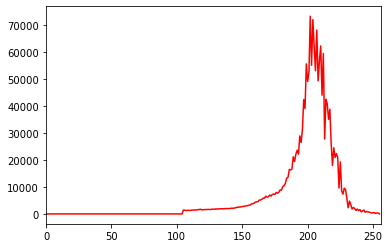

In [34]:
#hist = cv2.calcHist([train[9,6]],[0],trainBin[9,6],[256],[1,256])
hist = cv2.calcHist([train[9,6]],[0],None,[256],[1,256])
#plt.hist(train[9,6].ravel(),256,[1,256]); plt.show()
plt.plot(hist,color = 'red')
plt.xlim([0,256])

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33.]),
 array([  74366,   39116,   24289,   18861,   10780,    8097,    5600,
           4850,    4017,    3953,    3779,    3913,    4132,    4886,
           6469,   10951,   11525,    7664,    5103,    4044,    3295,
           3028,    2650,    2678,    2677,    3076,    3638,    5107,
           7775,   14931,   25177,   33640, 4034909,  752863], dtype=int64))

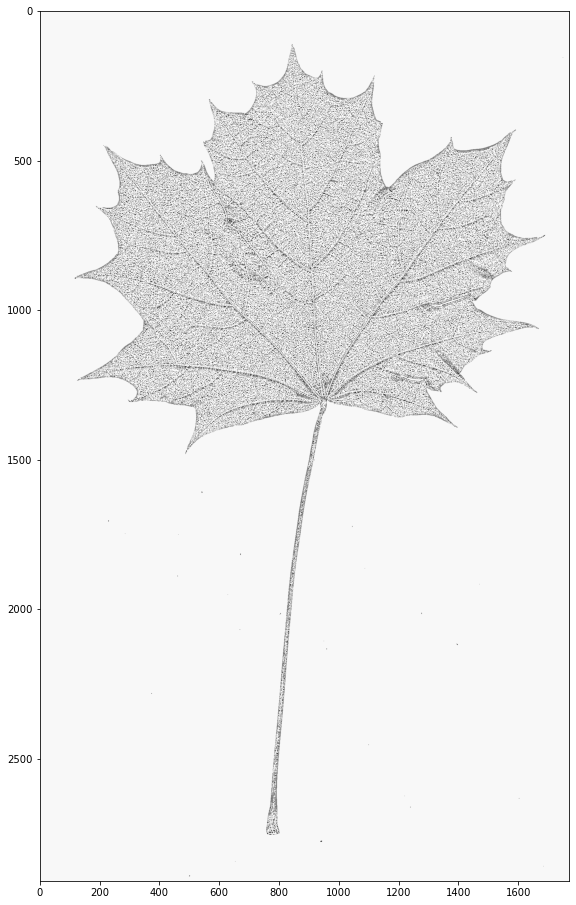

In [35]:
gg = lbp(train[1,6],32,3,method='uniform')
plt.figure(figsize = (16,16))
plt.imshow(gg,cmap='gray')
ggu = np.unique(gg,return_counts=True)
ggu

In [36]:
v = ggu[1][:]/sum(ggu[1][:])
v

array([1.44348455e-02, 7.59262857e-03, 4.71462715e-03, 3.66102279e-03,
       2.09245669e-03, 1.57167179e-03, 1.08699049e-03, 9.41411407e-04,
       7.79721571e-04, 7.67298823e-04, 7.33524475e-04, 7.59534605e-04,
       8.02043697e-04, 9.48399203e-04, 1.25566812e-03, 2.12564872e-03,
       2.23706525e-03, 1.48762413e-03, 9.90520084e-04, 7.84962418e-04,
       6.39577440e-04, 5.87751286e-04, 5.14379428e-04, 5.19814381e-04,
       5.19620275e-04, 5.97068348e-04, 7.06155608e-04, 9.91296506e-04,
       1.50916983e-03, 2.89818839e-03, 4.88699278e-03, 6.52970716e-03,
       7.83197806e-01, 1.46134807e-01])

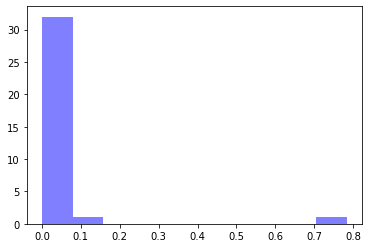

In [37]:
n, bins, patches = plt.hist(v, 10, facecolor='blue', alpha=0.5)
plt.show()

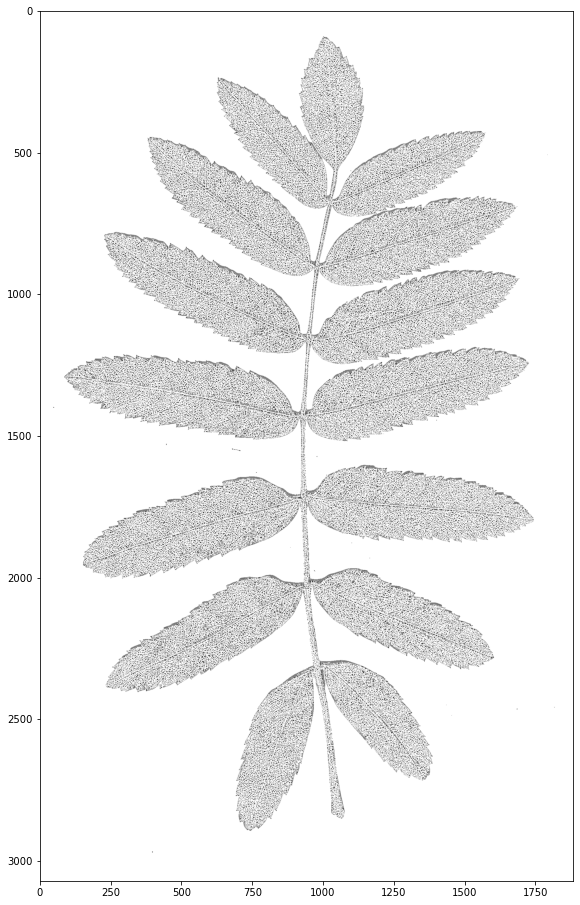

In [38]:
gg = lbp(train[9,6],256,3,method='uniform')
plt.figure(figsize = (16,16))
plt.imshow(gg,cmap='gray')
ggu = np.unique(gg,return_counts=True)
v = ggu[1][:]/sum(ggu[1][:])
n, bins, patches = plt.hist(v, 256, facecolor='blue', alpha=0.5)
plt.show()

In [39]:
#hist = cv2.calcHist([train[9,6]],[0],trainBin[9,6],[256],[1,256])
hist = cv2.calcHist([gg.astype(np.uint8)],[0],None,[256],[2,256])
#plt.hist(train[9,6].ravel(),256,[1,256]); plt.show()
plt.plot(hist1,color = 'red')
plt.xlim([0,256])
plt.ylim(0, 0.02)

NameError: name 'hist1' is not defined

In [ ]:
gg.astype(np.uint8)
cv2.imshow('image',gg.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
hist1 = hist/sum(hist)
hist1

In [ ]:
d = sum(hist1)
d

In [ ]:
gg = lbp(train[9,9],32,3,method='uniform')
hist2 = cv2.calcHist([gg.astype(np.uint8)],[0],None,[256],[0,256])
d = sum(hist2)
hist2 = hist2/sum(hist2)
#plt.hist(train[9,6].ravel(),256,[1,256]); plt.show()
plt.plot(hist2,color = 'red')
plt.xlim([0,256])
plt.ylim(0, 0.02)

In [ ]:
e = sum(hist2[:31])
print(d)
print(e)